#**ACIDENTES DE TRÂNSITO EM RECIFE**
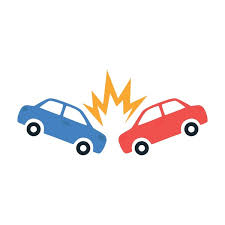

#Visão Geral do Projeto
Este projeto teve como objetivo realizar uma análise aprofundada dos acidentes de trânsito ocorridos na cidade do Recife entre os anos de 2020 e 2022. Utilizando dados abertos da CTTU (Autarquia de Trânsito e Transporte Urbano do Recife), o estudo buscou identificar padrões, tendências e os principais fatores associados a essas ocorrências.

O trabalho foi estruturado em duas frentes principais:

**Análise Exploratória de Dados (EDA):** Nesta fase, os dados brutos de três anos distintos foram consolidados, limpos e tratados para garantir a qualidade e a consistência das informações. Foram investigados os bairros com maior número de acidentes, os dias da semana e horários de pico das ocorrências, os tipos de veículos mais envolvidos e a distribuição de vítimas, incluindo fatais. A análise também contou com visualizações específicas dos dados, como a distribuição de variáveis, identificação de outliers e verificação de desbalanceamento de dados.

**Modelagem Preditiva:** Com os dados tratados e enriquecidos, o projeto avançou para a construção de um modelo de Machine Learning. O objetivo foi criar um modelo onde se pode prever se em uma acidente haverá vítima ou não.
os modelos escolhidos foram `LightGBM` e `CatBoost`, pois são modelos que além de se dar bem com o desbalanceamento de dados, também permitem a entrada de colunas formatadas como 'category', sem a necessidade de utilizar técnicas de encodamento.

O projeto combina, portanto, uma análise descritiva para gerar insights acionáveis com uma abordagem preditiva para criar uma ferramenta de classificação de risco, visando aprimorar a alocação de recursos e a formulação de políticas públicas de segurança no trânsito.

---

#Conclusão
Ao final deste projeto, foi possível extrair conclusões valiosas sobre a dinâmica dos acidentes de trânsito no Recife. A análise exploratória demonstrou que bairros como Boa Viagem concentram um volume significativamente alto de ocorrências, e que os dias úteis, especialmente no período da tarde, representam os momentos de maior risco. Além disso, automóveis e motocicletas são, de longe, os veículos com maior envolvimento nos acidentes registrados.

Já na modelagem, o modelo CatBoost mostrou-se muito eficiente em detectar acidentes com vítimas, com **recall de 94%**. Ele teve um alto desempenho geral, com precisão também alta, o que indica que o modelo não está apenas identificando corretamente, mas também não cometendo muitos erros ao classificar as classes.

- DICIONÁRIO

| Coluna                   | Descrição                                                                 |
|--------------------------|---------------------------------------------------------------------------|
| data                     | Data em que o acidente ocorreu.                                           |
| hora                     | Hora exata do acidente.                                                   |
| natureza_acidente        | Tipo de ocorrência (ex: com vítima, sem vítima, etc.).                    |
| situacao                 | Situação atual do caso (ex: finalizada, em andamento).                   |
| bairro                   | Bairro onde o acidente ocorreu.                                           |
| endereco                 | Nome da rua ou avenida principal do acidente.                             |
| numero                   | Número do endereço (se houver).                                           |
| detalhe_endereco_acidente| Informações adicionais sobre o local do acidente.                        |
| complemento              | Complemento do endereço (ex: pontos de referência).                       |
| bairro_cruzamento        | Bairro do cruzamento (caso tenha ocorrido em interseção).                 |
| sinalizacao              | Condição da sinalização no local (ex: perfeita, incompleta).              |
| condicao_via             | Condição da pista no momento (ex: seca, molhada, oleosa).                 |
| conservacao_via          | Estado de conservação da via (ex: bom, regular, ruim).                    |
| ponto_controle           | Tipo de controle viário presente (ex: faixa de pedestre, semáforo).       |
| situacao_placa           | Situação da sinalização vertical (ex: há placas, outras, inexistente).    |
| velocidade_max_via       | Velocidade máxima permitida no trecho (ex: 60 km/h).                      |
| mao_direcao              | Tipo de mão de direção da via (ex: única, dupla).                         |
| divisao_via1             | Tipo de separação física ou sinalização da pista (ex: faixa contínua).    |
| divisao_via2             | Segunda divisão da via, se houver.                                        |
| divisao_via3             | Terceira divisão da via, se houver.                                       |


- FUNÇÕES

In [134]:
# ======================= FUNÇÃO TRATAR DADOS NUMÉRICOS =======================

def tratar_numericos(train, validation):

  colunas_numericas = [
      'numero', 'num_semaforo', 'auto', 'moto', 'ciclom',
      'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura',
      'outros', 'vitimas', 'vitimasfatais', 'velocidade_max_via'
      ]

  for col in colunas_numericas:

    # Train
    train[col] = train[col].replace('S/N', np.nan)
    train[col] = train[col].replace('n/i', np.nan)
    train[col] = train[col].replace('N/I', np.nan)
    train[col] = train[col].str.extract(r'(\d+)')
    train[col] = train[col].str.replace(',', '.')
    train[col] = train[col].astype(float)

    # Validation
    validation[col] = validation[col].replace('S/N', np.nan)
    validation[col] = validation[col].replace('n/i', np.nan)
    validation[col] = validation[col].replace('N/I', np.nan)
    validation[col] = validation[col].str.extract(r'(\d+)')
    validation[col] = validation[col].str.replace(',', '.')
    validation[col] = validation[col].astype(float)

  return train, validation




# ======================= FUNÇÃO TREINAR, TESTAR, E AVALIAR MODELO =======================

def train_test_avaliate(model, x, y):

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

  model.fit(x_train, y_train)
  pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, pred)
  recall = recall_score(y_test, pred)
  precision = precision_score(y_test, pred)

  metrics_df = pd.DataFrame({
      'Metricas': ['Accuracy', 'Recall', 'Precision'],
      'Valores': [accuracy, recall, precision]
  })

  print('Métricas')
  print(metrics_df)

  print("\nClassification Report:")
  print(classification_report(y_test, pred))

  print("\nMatriz de Confusão:")
  print(confusion_matrix(y_test, pred))

  return model




# ======================= FUNÇÃO TESTAR E AVALIAR MODELO =======================

def predict_avaliate(model, x, y):

  pred = model.predict(x)

  accuracy = accuracy_score(y, pred)
  recall = recall_score(y, pred)
  precision = precision_score(y, pred)

  metrics_df = pd.DataFrame({
      'Metricas': ['Accuracy', 'Recall', 'Precision'],
      'Valores': [accuracy, recall, precision]
  })

  print('Métricas')
  print(metrics_df)

  print("\nClassification Report:")
  print(classification_report(y, pred))

  print("\nMatriz de Confusão:")
  print(confusion_matrix(y, pred))

- IMPORTS

In [135]:
# pip install
# pip install pandas, numpy, matplotlib, seaborn, scikit-learn, lightgbm, catboost, joblib

In [177]:
# Formatação de texto
from IPython.display import display, Markdown

# Manipulação de dados
import pandas as pd
import numpy as np
import re

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão dos dados
from sklearn.model_selection import train_test_split

# Modelos
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metricas e score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Download do modelo
import joblib

- PALETA DE CORES UTILIZADA

In [137]:
colors = ['#134686', '#ED3F27', '#FEB21A', '#FDF4E3']
sns.set_palette(sns.color_palette(colors))
sns.color_palette(colors)

[(0.07450980392156863, 0.27450980392156865, 0.5254901960784314),
 (0.9294117647058824, 0.24705882352941178, 0.15294117647058825),
 (0.996078431372549, 0.6980392156862745, 0.10196078431372549),
 (0.9921568627450981, 0.9568627450980393, 0.8901960784313725)]

- LENDO DATASETS

In [138]:
# Lendo base de dados
df20 = pd.read_csv('/content/acidentes_2020-novo.csv', sep= ';')
df21 = pd.read_csv('/content/acidentes2021.csv', sep= ';')
df22 = pd.read_csv('/content/acidentes2022.csv', sep= ';')

In [139]:
display(Markdown('###dataframe 2020'))
display(df20.head())
display(Markdown('###dataframe 2021'))
display(df21.head())
display(Markdown('###dataframe 2022'))
display(df22.head())

###dataframe 2020

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


###dataframe 2021

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2021-01-01,19:44:00,COM VÍTIMA,FINALIZADA,MADALENA,RUA BENFICA,NaN,NaN,EM FRENTE AO EXTRA NA SAIDA,MADALENA,...,Perfeito estado,Seca,Perfeito estado,Outros,Não há placas,NaN,Dupla,Faixa contínua,Faixa seccionada,NaN
1,2021-01-01,23:15:40,COM VÍTIMA,FINALIZADA,VÁRZEA,AV CAXANGA,NaN,RUA GASTAO VIDIGAL,EM FRENTE A UPA DA CAXANGA,VÁRZEA,...,Perfeito estado,Oleosa,Perfeito estado,Outros,Outras,NaN,Única,Não existe,NaN,NaN
2,2021-01-02,10:54:00,COM VÍTIMA,FINALIZADA,VASCO DA GAMA,RUA RESPLENDOR,353,NaN,AO LADO DO COLEGIO ADERBAL GALVÃO EM FRE...,VASCO DA GAMA,...,Incompleta,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
3,2021-01-02,11:13:00,COM VÍTIMA,FINALIZADA,BOA VIAGEM,RUA VISCONDE DE JEQUITINHONHA,22,RUA CAPITAO ZUZINHA,RUA CAPITÃO ZUZINHA,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,NaN,Única,Canal,NaN,NaN
4,2021-01-03,09:32:00,COM VÍTIMA,FINALIZADA,ILHA DO RETIRO,AV ENGENHEIRO ABDIAS DE CARVALHO,365,NaN,EM FRENTE A LANCHONETE COXINHAS DE BATATA,ILHA DO RETIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Outras,60 km/h,Dupla,Faixa contínua,Faixa seccionada,Canteiro central


###dataframe 2022

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,...,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
2,"202200025,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,CAXANGÁ,AV CAXANGA,NaN,NaN,PROX AO CRUZAMENTO DE SAN MARTIN E/F A IGREJA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"202200029,0",2022-01-01,NaN,COM VÍTIMA,CANCELADA,JOANA BEZERRA,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,ENFRENTE AO FORUM DE JOANA BEZERRA SENTIDO BOA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"202200082,0",2022-01-02,NaN,COM VÍTIMA,FINALIZADA,AFLITOS,RUA MANUEL DE CARVALHO,"432,0",RUA CARNEIRO VILELA,PRÓX AO CAMPO DO NAUTICO,...,Perfeito estado,Seca,Perfeito estado,NaN,"Placas ""Pare""",NaN,Única,Faixa contínua,NaN,NaN


**Obs.:** Antes de começar a análise e pré processamento, vou dividir os dados em duas bases: `train` e `validation`, para assim, diminuir a chance de vazamento de dados.

In [140]:
# Concatenando os dataframes
df20.columns = df20.columns.str.lower().str.strip()
df21.columns = df21.columns.str.lower().str.strip()
df22.columns = df22.columns.str.lower().str.strip()

df = pd.concat([df20, df21, df22], ignore_index=True)

In [141]:
# Divisão dos treino em "train" e "validation"
train, validation = train_test_split(df, test_size=0.4, random_state=42)

In [142]:
print('Tamanho do train', train.shape)
print('Tamanho do validation', validation.shape)

Tamanho do train (5484, 40)
Tamanho do validation (3657, 40)


- PRÉ PROCESSAMENTO

In [143]:
train.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,protocolo,natureza
2397,2020-04-01,14:25:00,COM VÍTIMA,FINALIZADA,PARNAMIRIM,RUA VIRGINIA LORETO,NaN,RUA JOAO TUDE DE MELO,E/F AO POSTO IPIRANGA,PARNAMIRIM,...,Perfeito estado,Não existe,Não há placas,40 km/h,Única,Faixa seccionada,NaN,NaN,NaN,NaN
452,2020-01-15,18:34:00,SEM VÍTIMA,FINALIZADA,DOIS IRMÃOS,NaN,NaN,NaN,PRÓXIMO AO HOTEL SENZALA,DOIS IRMÃOS,...,NaN,Não existe,R-6a,NaN,Dupla,Não existe,NaN,NaN,NaN,NaN
6646,2022-01-26,NaN,NaN,FINALIZADA,BOA VISTA,RUA JOAQUIM FELIPE,"60,0",NaN,E/F AO NUCE,BOA VISTA,...,Perfeito estado,Não existe,Outras,NaN,Única,Faixa seccionada,NaN,NaN,"202201712,0",COM VÍTIMA
5882,2021-10-09,01:20:00,COM VÍTIMA,FINALIZADA,SANTO AMARO,AV GOVERNADOR AGAMENON MAGALHAES,NaN,RUA ODORICO MENDES,NaN,SANTO AMARO,...,Perfeito estado,Faixa de pedestre,Outras,60 km/h,Dupla,Faixa contínua,Faixa seccionada,Canteiro central,NaN,NaN
7534,2022-06-13,NaN,NaN,FINALIZADA,SANTO AMARO,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,"PRÓXIMO AO SHOPPING TACARUNA, PISTA LOCAL",SANTO AMARO,...,Perfeito estado,Não existe,Não há placas,30KM/H,Única,NaN,NaN,NaN,"202213459,0",SEM VÍTIMA


In [144]:
print('Informações do dataframe: ')
df.info()
print('Valores nulos no dataframe: ')
df.isnull().sum()

Informações do dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   data                       9141 non-null   object
 1   hora                       6472 non-null   object
 2   natureza_acidente          6471 non-null   object
 3   situacao                   9140 non-null   object
 4   bairro                     9092 non-null   object
 5   endereco                   9118 non-null   object
 6   numero                     5119 non-null   object
 7   detalhe_endereco_acidente  3595 non-null   object
 8   complemento                8328 non-null   object
 9   bairro_cruzamento          9091 non-null   object
 10  num_semaforo               2375 non-null   object
 11  sentido_via                5910 non-null   object
 12  tipo                       8977 non-null   object
 13  descricao                  3988 non-

,0
data,0
hora,2669
natureza_acidente,2670
situacao,1
bairro,49
endereco,23
numero,4022
detalhe_endereco_acidente,5546
complemento,813
bairro_cruzamento,50


No dataframe existem colunas com dados não preenchidos e colunas com mais de 90% de valores nulos. Irei tirar essas colunas, pois elas não terão importância para minha análise. Além disso, tratarei os valores nulos das colunas categoricas e numéricas. Tratarei também, valores numéricos que estão mal formatados, ou seja, colunas numéricas que possuem string misturadas. Por exemplo: 60km, N/A, 3,0... (km, N/A e a vírgula em vez do ponto).

In [145]:
colunas_numericas = ['numero', 'num_semaforo', 'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros', 'vitimas', 'vitimasfatais', 'velocidade_max_via']

for col in colunas_numericas:     # Verificando se tem alguma letra ou caractere nos dados das colunas numéricas
  teste = train[col].value_counts(dropna=False)
  print(teste)

numero
NaN      2423
S/N        15
25         10
50         10
165         9
         ... 
111         1
90 A        1
472,0       1
2294        1
1447        1
Name: count, Length: 1931, dtype: int64
num_semaforo
NaN      4060
37,0        9
37.0        8
52.0        8
75,0        8
         ... 
38,0        1
590.0       1
333.0       1
436.0       1
353,0       1
Name: count, Length: 836, dtype: int64
auto
1.0    2032
1,0     999
2.0     934
0,0     414
0       390
NaN     368
2,0     195
3.0      84
3,0      31
4        22
5.0       5
4,0       3
5,0       3
6.0       2
7,0       1
9         1
Name: count, dtype: int64
moto
1.0    1695
NaN    1407
1,0     939
0,0     628
0       567
2       167
2,0      77
3,0       2
4         1
3.0       1
Name: count, dtype: int64
ciclom
NaN    2402
0,0    1638
0      1416
1.0      20
1,0       8
Name: count, dtype: int64
ciclista
NaN    2335
0,0    1557
0      1327
1       173
1,0      87
2         2
2,0       2
3         1
Name: count, dtype: i

In [146]:
# Função para tratamento dos dados numéricos
train, validation = tratar_numericos(train, validation)

Antes de partir para tratamento dos valores nulos, irei verificar colunas por coluna para saber se vale a pena tratar-la ou apenas dropar.

In [147]:
for col in train.columns:
  value_count = train[col].value_counts(dropna=False)
  print('\n', value_count)


 data
2020-02-11    38
2020-02-20    33
2020-02-12    31
2020-02-06    30
2020-03-02    28
              ..
2020-05-01     1
2021-08-29     1
2020-07-20     1
2020-04-23     1
2021-04-01     1
Name: count, Length: 1044, dtype: int64

 hora
NaN         1646
17:43:00      12
12:26:00      11
16:52:00      11
15:45:00      10
            ... 
22:54:00       1
21:07:00       1
11:14:00       1
20:10:00       1
00:06:00       1
Name: count, Length: 1199, dtype: int64

 natureza_acidente
COM VÍTIMA      2118
SEM VÍTIMA      1684
NaN             1646
VÍTIMA FATAL      32
OUTROS             4
Name: count, dtype: int64

 situacao
FINALIZADA                4769
CANCELADA                  667
DUPLICIDADE                 37
EQUIPE EM DESLOCAMENTO       6
PENDENTE                     2
EQUIPE NO LOCAL              2
EVADIU-SE                    1
Name: count, dtype: int64

 bairro
BOA VIAGEM             664
IMBIRIBEIRA            280
SANTO AMARO            273
BOA VISTA              216
MADALENA  

In [148]:
# Dropando colunas que não serão importantes ou possuem muitos dados nulos
cols_drop = [
    'numero', 'endereco', 'detalhe_endereco_acidente', 'complemento',
    'protocolo', 'divisao_via2', 'divisao_via3',
    'velocidade_max_via', 'descricao', 'natureza', 'num_semaforo'
]

train = train.drop(columns=cols_drop)
validation = validation.drop(columns=cols_drop)


In [149]:
# Preenchendo os dados categóricos com 'Não informado'
cols_nao_informado = [
    'hora', 'natureza_acidente', 'sentido_via', 'mao_direcao',
    'acidente_verificado', 'tempo_clima', 'situacao_semaforo',
    'sinalizacao', 'condicao_via', 'conservacao_via',
    'ponto_controle', 'situacao_placa', 'divisao_via1'
]

for col in cols_nao_informado:
    train[col] = train[col].fillna('Não informado')
    validation[col] = validation[col].fillna('Não informado')

Preenchi dados categoricos com Não informado, para não distorcer a visão do modelo posteriormente criado. Escolhi preencher dessa forma, pois, mais de 50% de quase todas as colunas estão nulas, e dessa forma eu não iria distorcer a realidade.

In [150]:
cols_zero = [
    'auto', 'moto', 'ciclom', 'ciclista', 'pedestre',
    'onibus', 'caminhao', 'viatura', 'outros',
    'vitimas', 'vitimasfatais'
]

for col in cols_zero:
    train[col] = train[col].fillna(0)
    validation[col] = validation[col].fillna(0)

Escolhi preencher os dados nulos das colunas numéricas dessa forma, pelo mesmo motivo do caso anterior.

In [151]:
cols_poucos_nulos = ['bairro', 'bairro_cruzamento', 'tipo']

for col in cols_poucos_nulos:
  train[col] = train[col].fillna(train[col].mode()[0])
  validation[col] = validation[col].fillna(train[col].mode()[0])

Nesse caso, preenchi pela moda das colunas, pois existiam poucos dados nulos, ou seja, não iria distorcer a realidade.

**Obs.:** Preenchi os dados de validação com a moda dos dados de treino, para não ter vazamento de dados!

In [152]:
# Criando variáveis de data qua acho que será importante
# Train
train['data'] = pd.to_datetime(train['data'])
train['hora'] = pd.to_datetime(train['hora'], errors='coerce').dt.time

train['ano'] = train['data'].dt.year
train['mes'] = train['data'].dt.month
train['dia'] = train['data'].dt.day
train['dia_semana'] = train['data'].dt.dayofweek
train['hora_ocorrencia'] = pd.to_datetime(train['hora'], format='%H:%M:%S', errors='coerce').dt.hour

# Validation
validation['data'] = pd.to_datetime(validation['data'])
validation['hora'] = pd.to_datetime(validation['hora'], errors='coerce').dt.time

validation['ano'] = validation['data'].dt.year
validation['mes'] = validation['data'].dt.month
validation['dia'] = validation['data'].dt.day
validation['dia_semana'] = validation['data'].dt.dayofweek
validation['hora_ocorrencia'] = pd.to_datetime(validation['hora'], format='%H:%M:%S', errors='coerce').dt.hour

/tmp/ipython-input-3121929573.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['hora'] = pd.to_datetime(train['hora'], errors='coerce').dt.time
/tmp/ipython-input-3121929573.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  validation['hora'] = pd.to_datetime(validation['hora'], errors='coerce').dt.time


- ANÁLISE EXPLORATÓRIA DOS DADOS

In [153]:
train.describe().drop('data', axis=1).round(2)

,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,ano,mes,dia,dia_semana,hora_ocorrencia
count,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,5484.00,3838.00
mean,0.28,0.20,0.00,0.02,0.02,0.03,0.01,0.02,0.00,0.27,0.00,2020.86,5.87,15.30,2.71,13.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,1.00,1.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,2.00,8.00,1.00,9.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,6.00,15.00,3.00,13.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,9.00,23.00,4.00,17.00
max,7.00,3.00,1.00,2.00,2.00,2.00,1.00,2.00,1.00,8.00,4.00,2022.00,12.00,31.00,6.00,23.00
std,0.57,0.44,0.04,0.13,0.16,0.17,0.12,0.14,0.04,0.56,0.08,0.85,3.73,8.76,1.92,5.06


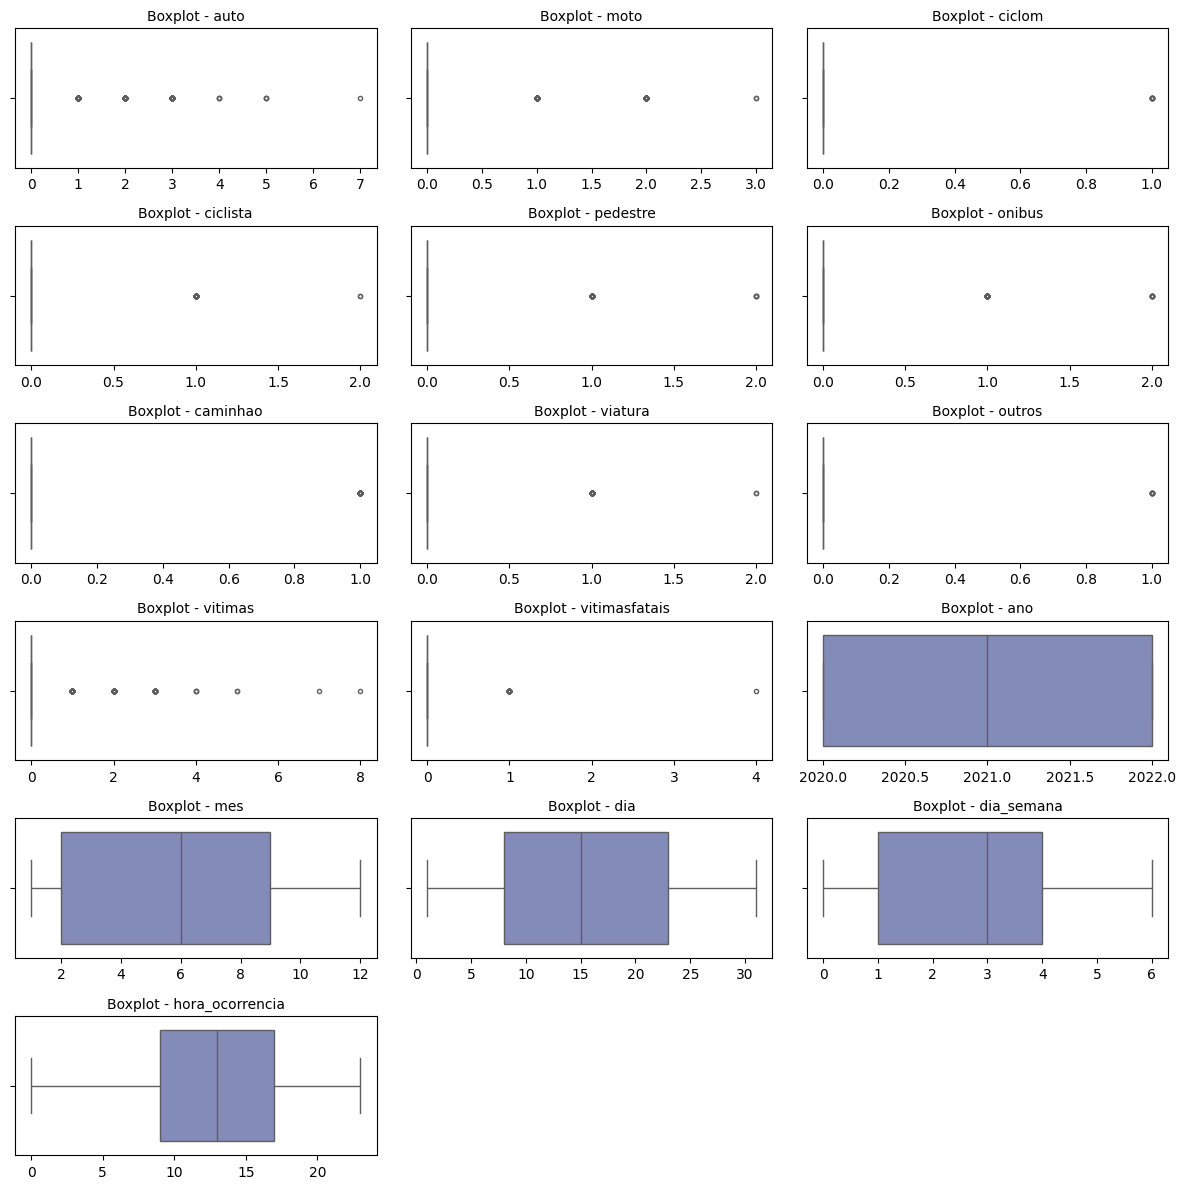

In [154]:
num_cols = train.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Cria a figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 2))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=train[col], ax=axes[i], color='#7A85C1', fliersize=3)
    axes[i].set_title(f'Boxplot - {col}', fontsize=10)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [155]:
# Trocando valores de 'auto' altos pela mediana
mediana_auto = train['auto'].median()
train.loc[train['auto'] > 5, 'auto'] = mediana_auto

**Conclusões sobre os outliers:**

Em relação às colunas numéricas, não há grandes alterações a serem feitas, pois os valores presentes estão dentro de uma faixa plausível e não distorcem a  realidade dos acidentes. No caso da coluna `auto`, observa-se um valor atípico de 7 veículos envolvidos em um único acidente, o que é improvável. Como se trata de um único caso isolado, esse valor foi substituído pela mediana da coluna, evitando distorções na análise sem comprometer os dados reais.

In [156]:
# Preparando variável preditora
# Train
train['vitima'] = train['vitimas'].apply(lambda x: 1 if x > 0 else 0)

# Validation
validation['vitima'] = validation['vitimas'].apply(lambda x: 1 if x > 0 else 0)

Criei a variável preditora (`vitima`) com base na coluna `vitimas`, onde os valores que tiverem maior que 0 eu colocarei como 1 (teve vítima), se for menor que 1 eu coloquei como 0 (não teve vítima).

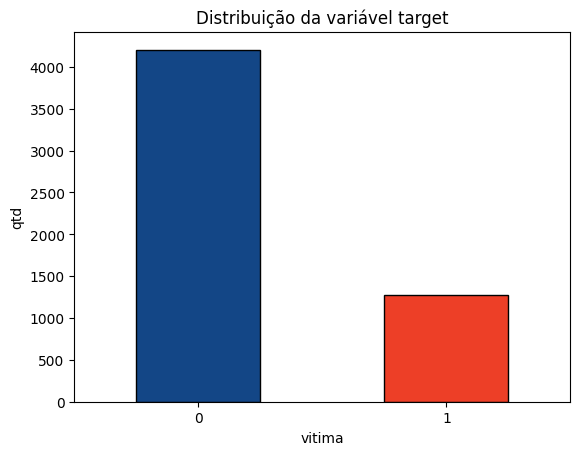

In [157]:
# Verificando distribuição da variável preditora
train.vitima.value_counts().plot(kind='bar', edgecolor='black', color=['#134686', '#ED3F27'])
plt.title('Distribuição da variável target')
plt.xlabel('vitima')
plt.ylabel('qtd')
plt.xticks(rotation=0)
plt.show()

Analisando o gráfico, é possível ver que há uma disparidade entre valores 0 (não teve vítima) e 1 (teve vítima). Ou seja, os dados estão desbalanceados.  

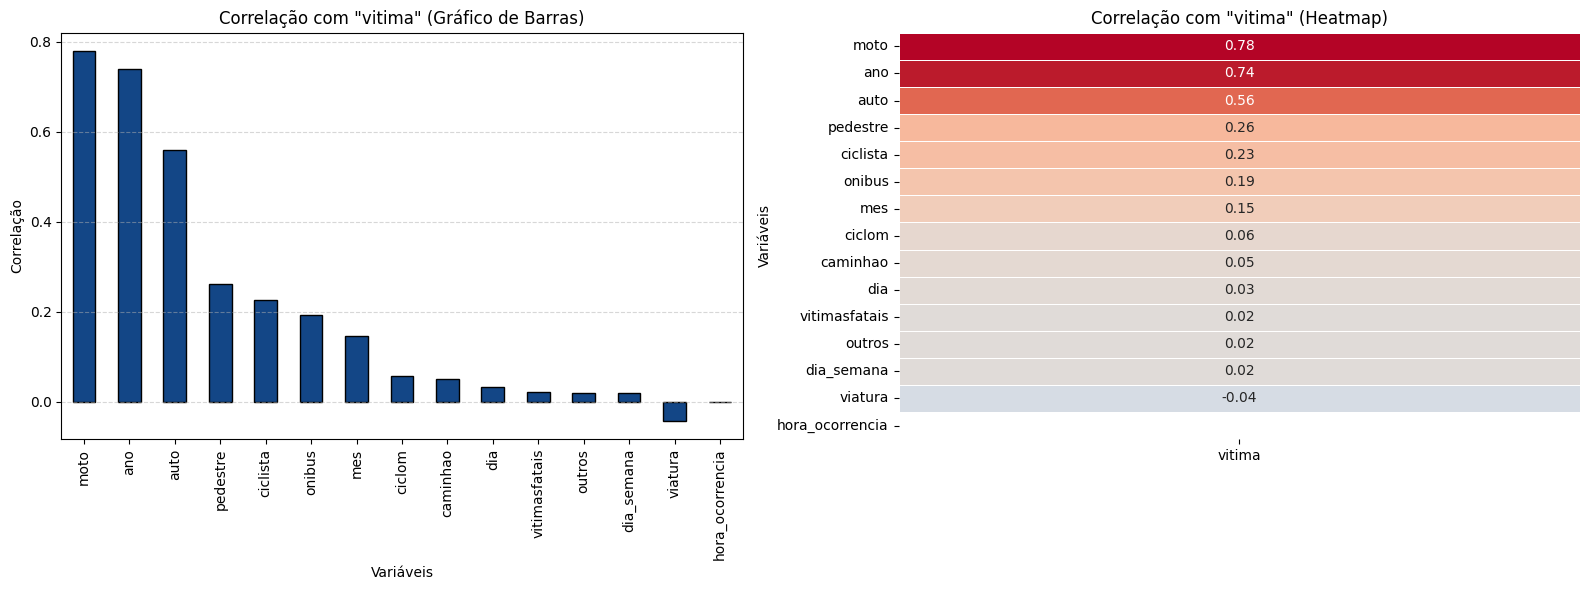

In [158]:
# Verificando correlações com a variável preditora
corr_matrix = train.corr(numeric_only=True)
corr_com_vitima = corr_matrix['vitima'].drop(['vitima', 'vitimas'])
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# === Subplot 1: Gráfico de barras ===
corr_com_vitima.sort_values(ascending=False).plot(
    kind='bar',
    ax=axes[0],
    color='#134686',
    edgecolor='black'
)
axes[0].set_title('Correlação com "vitima" (Gráfico de Barras)')
axes[0].set_ylabel('Correlação')
axes[0].set_xlabel('Variáveis')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# === Subplot 2: Heatmap ===
sns.heatmap(
    corr_com_vitima.to_frame().sort_values(by='vitima', ascending=False),
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar=False,
    fmt=".2f",
    ax=axes[1]
)
axes[1].set_title('Correlação com "vitima" (Heatmap)')
axes[1].set_ylabel('Variáveis')

plt.tight_layout()
plt.show()


É possível ver que as colunas que mais possuem correlações são: `moto`, `ano` e `auto`. Os resultados indicam que acidentes envolvendo motos e automóveis têm maior relação com a ocorrência de vítimas. O ano da ocorrência também apresenta forte correlação, sugerindo influência temporal nos registros. Outras variáveis, como pedestres, ciclistas e ônibus, possuem correlação moderada, enquanto várias outras apresentam pouca ou nenhuma associação com a presença de vítimas. A baixa correlação entre vítimas e vítimas fatais sugere que a quantidade de vítimas nem sempre está diretamente ligada à fatalidade. Esses insights podem orientar a seleção de variáveis para modelagem.

Depois de entendi mais sobre os dados, decidi responder à algumas perguntas.

###**Quais os bairros tem mais acidentes?**

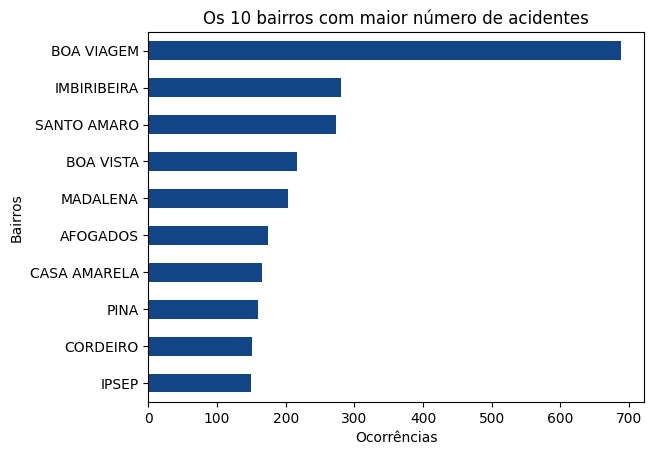

In [159]:
train['bairro'].value_counts().head(10)[::-1].plot(kind='barh')
plt.title('Os 10 bairros com maior número de acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Bairros')
plt.show()

Observando o gráfico, fica evidente que **Boa Viagem** se destaca significativamente, com **mais de 1000 ocorrências**, superando com folga os demais bairros no número de acidentes.

###**Qual o dia da semana e horários em que mais ocorrem acidentes?**

**Dia da semana**

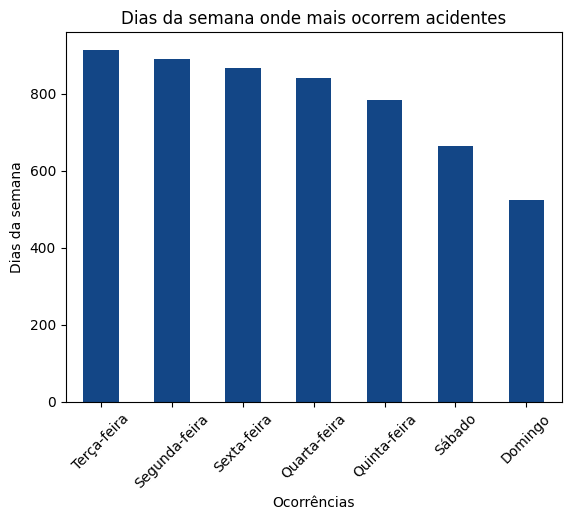

In [160]:
dias_pt = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

train['data'].dt.day_name().map(dias_pt).value_counts().plot(kind='bar')
plt.title('Dias da semana onde mais ocorrem acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Dias da semana')
plt.xticks(rotation=45)
plt.show()

**Horarios**

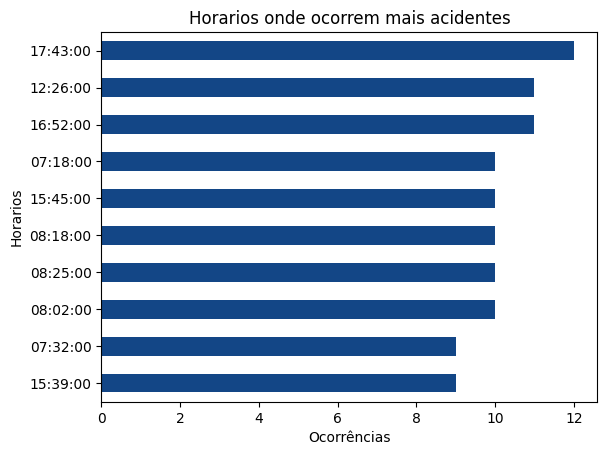

In [161]:
teste = train['hora'].value_counts().head(10)[::-1].plot(kind='barh')
plt.title('Horarios onde ocorrem mais acidentes')
plt.xlabel('Ocorrências')
plt.ylabel('Horarios')
plt.show()

A análise dos gráficos de acidentes por dia da semana e horário revela que as ocorrências se concentram principalmente entre **segunda-feira** e **sexta-feira**, Provavelmente por questõe de trabalho. Além disso, os acidentes tendem a ocorrer com maior frequência durante o período da tarde.

###**Qual veículos com maior envolvimento em acidentes?**

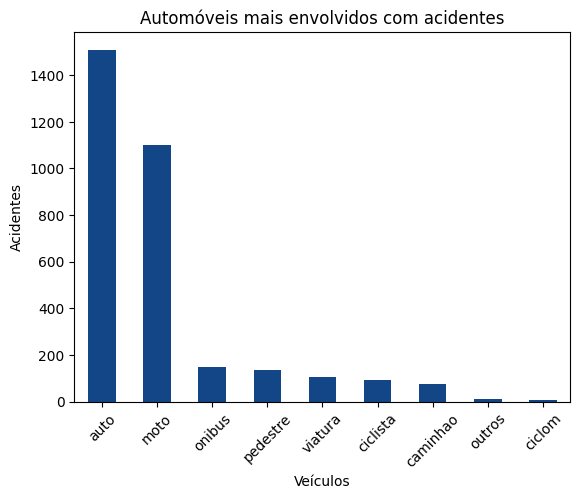

In [162]:
veiculos = ['auto','moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros']

train[veiculos].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Automóveis mais envolvidos com acidentes')
plt.xlabel('Veículos')
plt.ylabel('Acidentes')
plt.xticks(rotation=45)
plt.show()

A partir do gráfico, observa-se que os veículos mais frequentemente envolvidos em acidentes de trânsito são as **motos** e, principalmente, os **carros**. Os carros se destacam com uma quantidade de ocorrências significativamente superior em comparação aos demais, evidenciando um padrão preocupante

###**Qual o total de número de vítimas fatais, e onde mais ocorreram?**

In [163]:
bairros_mortes = train.groupby('bairro')['vitimasfatais'].sum()
bairros_morte = bairros_mortes.sort_values(ascending=False)
bairro_mais_mortes = bairros_morte.index[0]
qtd_mortes = bairros_morte.iloc[0]

print(f"Número total de mortos em acidentes: {train['vitimasfatais'].sum()}")
print(f"Bairro com mais mortes: {bairro_mais_mortes} ({qtd_mortes} mortes)")

Número total de mortos em acidentes: 21.0
Bairro com mais mortes: TORRÕES (4.0 mortes)


###**Qual a maior quantidade acidentes por ano?**

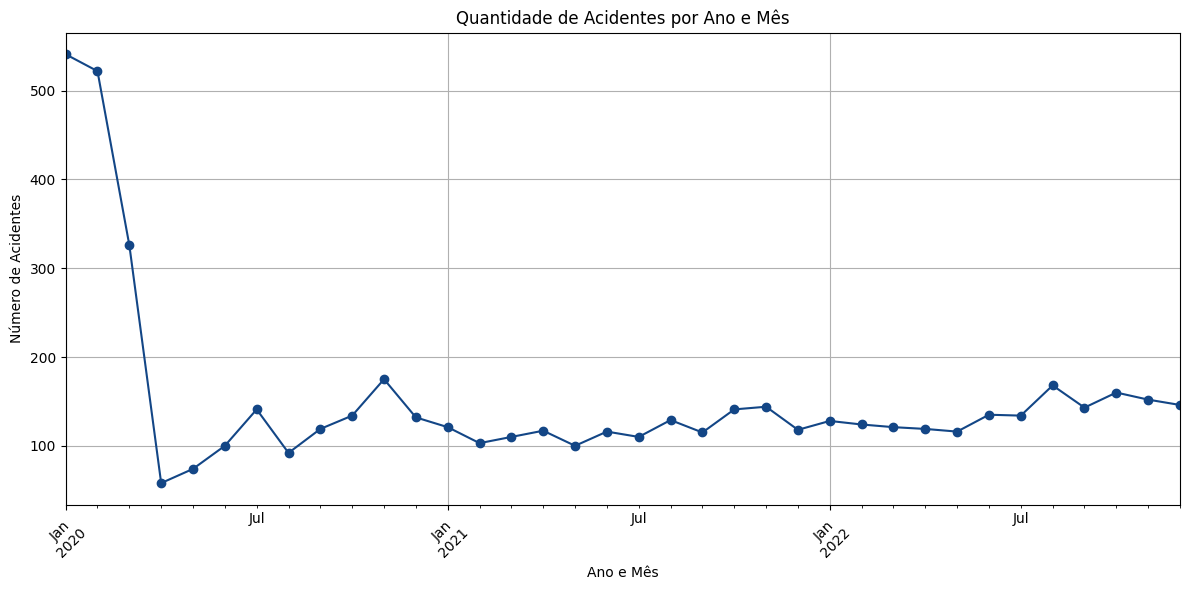

In [164]:
acidentes_ano_mes = train.groupby(['ano', 'mes']).size()
acidentes_ano_mes.index = pd.to_datetime(acidentes_ano_mes.index.map(lambda x: f'{x[0]}-{x[1]:02d}-01'))
acidentes_ano_mes = acidentes_ano_mes.sort_index()

plt.figure(figsize=(12, 6))
acidentes_ano_mes.plot(kind='line', marker='o')
plt.title('Quantidade de Acidentes por Ano e Mês')
plt.xlabel('Ano e Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

A partir de março de 2020, observamos uma queda expressiva no número de acidentes, muito provavelmente relacionada às medidas de isolamento social durante a pandemia de COVID-19. Nos meses seguintes, os acidentes permaneceram em um patamar mais baixo ao longo de 2020 e 2021. Já em **2022**, **nota-se um leve aumento**, indicando que a movimentação nas ruas foi voltando ao normal. Além disso, alguns picos ao longo do tempo sugerem uma possível influência de datas comemorativas, feriados ou maior fluxo de veículos em determinados períodos

<hr>

Depois de entender mais sobre os dados, agora partirei para a padronização e a preparação dos dados que vou utilizar no modelo, ou seja, irei dropar colunas que não precisarei, e também, vou tranformar as colunas 'object' para 'category'.

<br>

**Por que farei essa trasnformação (object -> category)?**

Como usarei modelos que usam como base árvores de decisão, elas não precisam ser tranformadas para número, e principalmente o LightGBM necessita dessa transformação 'object' para 'category'.

In [165]:
train.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro',
       'bairro_cruzamento', 'sentido_via', 'tipo', 'auto', 'moto', 'ciclom',
       'ciclista', 'pedestre', 'onibus', 'caminhao', 'viatura', 'outros',
       'vitimas', 'vitimasfatais', 'acidente_verificado', 'tempo_clima',
       'situacao_semaforo', 'sinalizacao', 'condicao_via', 'conservacao_via',
       'ponto_controle', 'situacao_placa', 'mao_direcao', 'divisao_via1',
       'ano', 'mes', 'dia', 'dia_semana', 'hora_ocorrencia', 'vitima'],
      dtype='object')

In [166]:
# Dropando colunas
# Train
train.drop(columns=['vitimasfatais', 'vitimas', 'data', 'hora_ocorrencia', 'hora'], inplace=True)

# Validation
validation.drop(columns=['vitimasfatais', 'vitimas', 'data', 'hora_ocorrencia', 'hora'], inplace=True)

In [167]:
# OBS.: Quando eu estava rodando a o código, estava dando erro por causa de valores nulos. Vi que era apenas 1 dado na coluna "situacao", somente na base de validation.
# validation.isna().sum()
validation = validation.dropna()

In [168]:
# Mudança de 'object' para 'category'
colunas_categoricas = [col for col in train.select_dtypes(include=['object']).columns]

for col in colunas_categoricas:
  train[col] = train[col].astype('category')
  validation[col] = validation[col].astype('category')

In [169]:
print('train:')
train.info()

print('\nvalidation:')
validation.info()

train:
<class 'pandas.core.frame.DataFrame'>
Index: 5484 entries, 2397 to 7270
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   natureza_acidente    5484 non-null   category
 1   situacao             5484 non-null   category
 2   bairro               5484 non-null   category
 3   bairro_cruzamento    5484 non-null   category
 4   sentido_via          5484 non-null   category
 5   tipo                 5484 non-null   category
 6   auto                 5484 non-null   float64 
 7   moto                 5484 non-null   float64 
 8   ciclom               5484 non-null   float64 
 9   ciclista             5484 non-null   float64 
 10  pedestre             5484 non-null   float64 
 11  onibus               5484 non-null   float64 
 12  caminhao             5484 non-null   float64 
 13  viatura              5484 non-null   float64 
 14  outros               5484 non-null   float64 
 15  acidente_verific

In [170]:
# Salvando os dados
train.to_csv('df_train.csv', index=False)
validation.to_csv('df_validation.csv', index=False)

- MODELO

Para começar a etapa de modelagem, irei fazer utilizar o método **cross_val_score** onde farei a validação cruzada dos modelos e pegarei os desempenhos deles com base em uma metrica (será o recall).

In [171]:
# Divisão das features e target
x = train.drop('vitima', axis=1)
y = train['vitima']

In [172]:
# Modelos
cat_features_category = x.select_dtypes(include=['category']).columns.tolist()

lgbm = LGBMClassifier(random_state=42, verbose=0)
cat = CatBoostClassifier(random_state=42, verbose=0, cat_features=cat_features_category )

In [173]:
# Validação Cruzada
lgbm_cross_val = cross_val_score(lgbm, x, y, cv=5, scoring='recall').mean()
cat_cross_val = cross_val_score(cat, x, y, cv=5, scoring='recall').mean()

print(f'lgbm score: {lgbm_cross_val}')
print(f'cat score: {cat_cross_val}')

lgbm score: 0.9240900735294117
cat score: 0.9311366421568629


Os dois modelos foram muito bem, porém como o **Cat** deu um pouco maior, utilizarei ele para dar continuidade.

- TREINO, TESTE E AVALIAÇÃO

In [174]:
# Função para terinar, testar e avaliar
cat_treinado = train_test_avaliate(cat, x, y)

Métricas
    Metricas   Valores
0   Accuracy  0.966586
1     Recall  0.940874
2  Precision  0.919598

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1257
           1       0.92      0.94      0.93       389

    accuracy                           0.97      1646
   macro avg       0.95      0.96      0.95      1646
weighted avg       0.97      0.97      0.97      1646


Matriz de Confusão:
[[1225   32]
 [  23  366]]


Depois do treino e teste, os resultados foram positivos! Tanto para 0 (não teve vítima) quando 1 (teve vitima), o modelo conseguiu prever. Ficando com um recall de 98% para 0, errando 25 dados, e 94% para 1, errando 33 dados.

- VALIDAÇÃO

In [175]:
# Dividindo base de validação
x_val = validation.drop('vitima', axis=1)
y_val = validation['vitima']

In [176]:
# Função para avaliar desempenho do modelo na base de validação
pred_metrics = predict_avaliate(cat_treinado, x_val, y_val)

Métricas
    Metricas   Valores
0   Accuracy  0.973468
1     Recall  0.940667
2  Precision  0.939506

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2847
           1       0.94      0.94      0.94       809

    accuracy                           0.97      3656
   macro avg       0.96      0.96      0.96      3656
weighted avg       0.97      0.97      0.97      3656


Matriz de Confusão:
[[2798   49]
 [  48  761]]


O modelo demonstrou um excelente desempenho tanto na base de treino quanto na base de validação. Inicialmente, tinha receio de que houvesse overfitting, pois o modelo obteve bons resultados na base de treino. No entanto, após avaliar o desempenho na base de validação, ficou claro que o modelo generalizou bem e manteve uma performance consistente, confirmando que não houve overfitting. Agora posso salvar o modelo para previsões futuras.

In [179]:
# Salvando modelo
joblib.dump(cat_treinado, 'catboost_model.pkl')

['catboost_model.pkl']